<a href="https://colab.research.google.com/github/Dmolight01/ProyectoModelosII/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USO DE PYCARET PARA ANALISIS DE MODELOS

En el presente notebook hacemos uso de la libreria Pycaret para analizar varios modelos con nuestros datos y escoger los mejores para el entrenamiento.

Primero instalamos la libreria.

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

En este caso trabajamos con dos archivos. Los datos balanceado con Oversampling y sin balancear. Por favor carguelos en el entorno antes de continuar.

Puede descargarla del siguiente link(data_resampled)
https://drive.google.com/file/d/1ZfDISHlfVL4P42ZBD9uC1Bl82YxvFqO4/view?usp=drive_link

Puede descargarla del siguiente link(base_de_datos_preprocesada)
https://drive.google.com/file/d/1iLscCDL4PIE4Kiym-BcWa9LDPPcU96qV/view?usp=sharing

Tambien puede descargarla de la carpeta del github. Los archivos se llaman: data_resampled.csv y base_de_datos_preprocesada.csv

In [3]:
dataset = pd.read_csv('data_resampled.csv')

In [4]:
datasetB = pd.read_csv('base_de_datos_preprocesada.csv')

In [5]:
dataset.shape

(1018, 53)

In [6]:
datasetB.shape

(617, 54)

Hacemos la particion de los datos

In [7]:
data=dataset.sample(frac=0.80,random_state=0)
data

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,GB,GE,GF,GH,GI,GL,EJ_encoded,Class
478,0.346113,2225.26986,85.200147,9.681222,8.138688,5.492580,0.027710,3.396778,1.229900,5360.95442,...,3.949109,0.94569,18.650510,72.611063,946.979748,40.387734,55.490900,0.126590,1,0
635,1.008428,2913.38234,85.200147,36.185348,8.138688,6.520224,0.130935,10.536944,4.989880,3319.66123,...,0.173229,0.86942,11.618198,72.611063,1307.646666,35.316011,12.947448,21.978000,0,1
247,0.346113,3260.84957,177.924870,20.288447,8.138688,4.048563,0.071862,3.396778,1.229900,5087.57657,...,5.524359,1.12433,29.757098,72.611063,4186.582848,30.504758,63.482104,0.291966,1,0
783,0.260653,5010.12842,85.200147,11.068678,8.138688,2.693136,0.025578,3.396778,2.438716,8245.67201,...,9.110839,0.76821,18.371450,72.611063,2798.992584,17.767775,36.864476,0.100967,1,1
27,0.273472,2310.59664,85.200147,13.217996,8.138688,5.377413,0.071862,13.599716,1.229900,5224.25351,...,0.173229,1.60254,28.212966,72.611063,30045.933290,32.294559,28.675228,21.978000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.260653,3775.27744,85.200147,13.766165,12.150348,4.757283,0.085869,7.751460,3.661588,5079.86622,...,0.173229,1.35778,6.864876,228.601835,36439.649660,30.679645,113.692688,21.978000,0,0
464,0.337567,3778.07859,85.200147,16.476040,8.138688,5.563452,0.025578,3.396778,2.125970,7727.47257,...,3.019391,0.49706,16.231990,323.529790,6080.391441,37.686288,96.390844,0.826435,1,0
25,0.235015,3081.43198,85.200147,8.739734,8.138688,4.402923,0.025578,11.954894,1.229900,5522.08875,...,4.531266,1.89254,27.254860,72.611063,1622.342844,35.319732,26.401580,0.363388,1,0
110,0.230742,1909.99831,85.200147,12.821580,8.138688,4.172589,0.075212,6.465852,8.338722,5931.01695,...,2.111970,1.59558,21.069030,72.611063,22920.074930,39.435158,35.015208,0.594000,1,0


In [8]:
data_unseen=dataset.drop(data.index)
data_unseen

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,GB,GE,GF,GH,GI,GL,EJ_encoded,Class
9,0.324748,5188.68207,85.200147,12.968687,8.138688,4.593392,0.025578,10.685041,1.229900,4951.698630,...,0.173229,1.57151,24.515421,98.929757,5563.130949,21.994831,33.300970,21.978000,0,0
11,0.760594,6957.75289,200.089275,23.462872,8.138688,7.627599,0.025578,16.794830,1.229900,12083.348910,...,6.890084,1.09011,42.928730,72.611063,8192.631033,32.659217,53.813956,0.437845,1,0
19,0.132463,2160.54454,85.200147,20.300835,8.138688,4.810437,0.025578,9.371074,5.158552,4589.927410,...,0.173229,1.00514,11.618198,72.611063,21451.810610,37.265815,51.308828,21.978000,0,0
23,0.371751,2354.54142,105.030540,5.150311,8.138688,10.409325,0.025578,11.526358,2.754976,5435.445190,...,4.648113,0.49706,21.664358,198.469061,5987.708568,32.610844,15.019194,0.136552,1,0
28,0.121780,4306.18430,85.200147,11.325729,8.138688,6.493647,0.025578,16.133120,6.497386,4262.549145,...,0.173229,1.50742,22.952685,136.229114,5164.049376,33.306671,71.065646,21.978000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.508487,3692.13592,110.621718,13.859075,8.138688,5.377413,0.025578,11.608284,3.756466,4987.597700,...,14.201978,1.85339,18.650510,75.393773,946.472364,45.835278,18.729304,0.043662,1,1
983,0.767003,7205.59114,85.200147,25.147640,8.138688,4.110576,0.025578,3.396778,11.733246,6557.073400,...,21.765886,3.72505,25.394460,72.611063,1260.860175,27.137253,13.232940,0.047864,1,1
994,0.837508,3503.18958,85.200147,18.334240,12.113640,5.085066,0.025578,11.242768,1.229900,5174.483800,...,0.173229,1.43782,13.590222,109.934713,12581.023680,16.558450,95.637248,21.978000,0,1
998,0.264926,1390.03590,85.200147,11.601362,10.217934,5.660901,0.074907,3.396778,3.113404,4906.738900,...,31.251519,1.13593,22.966638,72.611063,4646.471769,23.356717,46.537768,0.062450,1,1


In [9]:
datab=datasetB.sample(frac=0.80,random_state=0)
datab

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,GB,GE,GF,GH,GI,GL,Class,EJ_encoded
49,1360fac6a227,0.478576,5192.25520,194.576478,13.230384,8.138688,7.290957,0.025578,9.705080,8.588216,...,10.690335,1.85861,12.418170,72.611063,434.357883,34.411808,36.769312,0.050038,1,1
514,d061b54c6650,0.329021,2561.59904,85.200147,24.045108,8.138688,3.711921,0.025578,10.631474,1.229900,...,8.013052,0.69977,17.255210,72.611063,3086.887077,31.944785,47.672020,0.108486,0,1
211,51a5b926ab4d,0.264926,2993.18184,117.771807,19.350056,8.138688,9.124770,0.025578,14.979854,1.229900,...,0.173229,1.72956,40.435794,72.611063,14566.937780,21.619010,26.900548,21.978000,0,0
249,6468478fce4c,0.927241,8941.06389,514.858662,72.197264,35.121690,6.263313,0.097135,10.133616,5.854324,...,27.212010,0.78561,34.854594,172.342506,27313.911020,35.189497,111.642804,0.001129,1,1
142,3840054e6aa5,0.444392,2673.56276,104.586381,31.967234,8.138688,6.041838,0.025578,11.595680,1.229900,...,11.421984,1.46392,20.427192,72.611063,1448.445726,41.053793,83.579712,0.045692,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,67ba3c5d8baf,0.192285,2382.25889,94.396851,10.613419,8.138688,3.791652,0.025578,15.578544,1.229900,...,7.362558,1.15971,25.022380,72.611063,6000.327558,43.587794,63.505252,0.139765,0,1
352,8b4dfe76ff44,0.301246,4272.49306,85.200147,11.057839,8.138688,4.673122,0.025578,15.023968,1.229900,...,7.901059,1.92676,9.032242,440.957944,13596.963910,33.172715,83.653014,0.105319,0,1
270,68c35486588c,0.303383,1691.60662,95.546439,113.124119,8.138688,3.871383,0.025578,8.520304,1.229900,...,0.265776,0.49706,13.497202,72.611063,4378.430862,27.014460,22.692756,2.970000,0,1
317,7eb06d1c9234,0.316202,2688.97090,85.200147,12.090688,8.138688,5.926671,0.025578,8.539210,1.229900,...,0.173229,0.49706,12.129808,72.611063,44792.362530,42.709638,19.081668,21.978000,0,0


In [10]:
datab_unseen=datasetB.drop(datab.index)
datab_unseen

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,GB,GE,GF,GH,GI,GL,Class,EJ_encoded
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,1
9,05f2bc0155cd,0.324748,5188.68207,85.200147,12.968687,8.138688,4.593392,0.025578,10.685041,1.229900,...,0.173229,1.57151,24.515421,98.929757,5563.130949,21.994831,33.300970,21.978000,0,0
11,06554e7b9979,0.760594,6957.75289,200.089275,23.462872,8.138688,7.627599,0.025578,16.794830,1.229900,...,6.890084,1.09011,42.928730,72.611063,8192.631033,32.659217,53.813956,0.437845,0,1
19,0c3a256bcec7,0.132463,2160.54454,85.200147,20.300835,8.138688,4.810437,0.025578,9.371074,5.158552,...,0.173229,1.00514,11.618198,72.611063,21451.810610,37.265815,51.308828,21.978000,0,0
23,0cf6c827b8bb,0.371751,2354.54142,105.030540,5.150311,8.138688,10.409325,0.025578,11.526358,2.754976,...,4.648113,0.49706,21.664358,198.469061,5987.708568,32.610844,15.019194,0.136552,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,f62ef7cc0a22,0.521306,4998.31277,85.200147,28.257028,8.138688,4.252320,0.025578,6.711630,1.229900,...,7.230382,1.55179,20.603930,216.055347,2790.445788,39.178409,101.053880,0.198861,0,1
599,f82b07dfd7fb,1.106707,3279.32506,118.764633,48.660064,8.138688,8.212293,0.025578,9.988670,1.229900,...,0.434226,1.14086,20.855084,72.611063,13738.933020,43.200810,21.648524,1.566000,0,1
600,f8eb43047d69,0.260653,3594.87128,85.200147,14.605452,8.138688,4.500372,0.025578,11.633492,1.229900,...,7.244017,1.17914,15.766890,276.539536,3318.761565,12.576980,85.524144,0.124255,0,1
602,f955c0ed8895,0.350386,5431.63797,85.200147,11.607556,8.138688,7.565586,0.025578,10.269109,2.393034,...,4.764967,0.49706,12.027486,212.210348,9146.473587,17.287766,30.712252,0.171600,0,1


In [11]:
data.reset_index(inplace=True,drop=True)
data_unseen.reset_index(inplace=True,drop=True)
print('Data for Modeling: '+str(data.shape))
print('Unseen Data for prediction: '+str(data_unseen.shape))

Data for Modeling: (814, 53)
Unseen Data for prediction: (204, 53)


In [12]:
datab.reset_index(inplace=True,drop=True)
datab_unseen.reset_index(inplace=True,drop=True)
print('Data for Modeling: '+str(datab.shape))
print('Unseen Data for prediction: '+str(datab_unseen.shape))

Data for Modeling: (494, 54)
Unseen Data for prediction: (123, 54)


## ¡¡IMPORTANTE!!
Primero corremos con la base de datos sin balancear

In [13]:
modelb_setup=setup(data=datab, target='Class', session_id=124)

,Description,Value
0,Session id,124
1,Target,Class
2,Target type,Binary
3,Original data shape,"(494, 54)"
4,Transformed data shape,"(494, 54)"
5,Transformed train set shape,"(345, 54)"
6,Transformed test set shape,"(149, 54)"
7,Numeric features,52
8,Categorical features,1
9,Preprocess,True


In [14]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8495,0.7676,0.3619,0.6679,0.4489,0.3735,0.4072,0.0850
lr,Logistic Regression,0.8494,0.7440,0.4119,0.6262,0.4763,0.3969,0.4182,0.9930
ridge,Ridge Classifier,0.8434,0.7859,0.1976,0.6167,0.2746,0.2298,0.2879,0.0790
rf,Random Forest Classifier,0.8261,0.9200,0.0167,0.1000,0.0286,0.0248,0.0376,0.4160
dt,Decision Tree Classifier,0.8232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780
qda,Quadratic Discriminant Analysis,0.8232,0.4851,0.0000,0.0000,0.0000,0.0000,0.0000,0.1600
ada,Ada Boost Classifier,0.8232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0910
gbc,Gradient Boosting Classifier,0.8232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2550
lda,Linear Discriminant Analysis,0.8232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0770
et,Extra Trees Classifier,0.8232,0.8910,0.0167,0.1000,0.0286,0.0196,0.0291,0.2250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Ahora con los datos balanceados

In [16]:
model_setup=setup(data=data, target='Class', session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(814, 53)"
4,Transformed data shape,"(814, 53)"
5,Transformed train set shape,"(569, 53)"
6,Transformed test set shape,"(245, 53)"
7,Numeric features,52
8,Preprocess,True
9,Imputation type,simple


In [17]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9667,0.9950,0.9517,0.9826,0.9660,0.9334,0.9354,0.2660
rf,Random Forest Classifier,0.9596,0.9913,0.9759,0.9485,0.9609,0.9192,0.9218,0.3760
xgboost,Extreme Gradient Boosting,0.9508,0.9868,0.9690,0.9381,0.9523,0.9016,0.9040,0.3690
lightgbm,Light Gradient Boosting Machine,0.9508,0.9898,0.9690,0.9391,0.9525,0.9015,0.9047,0.7670
gbc,Gradient Boosting Classifier,0.9420,0.9839,0.9690,0.9227,0.9442,0.8839,0.8874,0.6100
ada,Ada Boost Classifier,0.9385,0.9725,0.9655,0.9210,0.9411,0.8769,0.8812,0.3440
dt,Decision Tree Classifier,0.9086,0.9078,0.9585,0.8754,0.9140,0.8170,0.8234,0.0550
ridge,Ridge Classifier,0.8717,0.9197,0.8443,0.8989,0.8686,0.7436,0.7483,0.0490
lda,Linear Discriminant Analysis,0.8682,0.9235,0.8514,0.8864,0.8665,0.7366,0.7405,0.0440
lr,Logistic Regression,0.8226,0.8789,0.8134,0.8376,0.8228,0.6452,0.6494,0.2230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Como se puede ver, hay un mejor rendimientos en la mayoria de modelos con casi todas las metricas con los datos balanceados. Por esto, trabajaremos con estos de ahora en adelante.


## Random Forest

In [18]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,1.0000,1.0000,0.9667,0.9831,0.9649,0.9655
1,0.9474,0.9852,0.9310,0.9643,0.9474,0.8948,0.8953
2,0.9123,0.9470,0.8621,0.9615,0.9091,0.8248,0.8294
3,0.9825,0.9975,1.0000,0.9667,0.9831,0.9649,0.9655
4,0.9123,0.9938,1.0000,0.8529,0.9206,0.8240,0.8370
5,0.9474,0.9963,1.0000,0.9062,0.9508,0.8945,0.8995
6,0.9825,0.9982,1.0000,0.9667,0.9831,0.9649,0.9655
7,0.9474,0.9963,0.9655,0.9333,0.9492,0.8946,0.8952
8,0.9825,0.9988,1.0000,0.9667,0.9831,0.9649,0.9655


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [20]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,0.9975,1.0000,0.9667,0.9831,0.9649,0.9655
1,0.9123,0.9778,0.8966,0.9286,0.9123,0.8246,0.8251
2,0.8947,0.9421,0.8621,0.9259,0.8929,0.7897,0.7916
3,0.9474,0.9877,0.9310,0.9643,0.9474,0.8948,0.8953
4,0.9298,0.9914,1.0000,0.8788,0.9355,0.8593,0.8679
5,0.9474,0.9865,1.0000,0.9062,0.9508,0.8945,0.8995
6,0.9298,0.9815,0.8966,0.9630,0.9286,0.8598,0.8619
7,0.9474,0.9938,0.9655,0.9333,0.9492,0.8946,0.8952
8,0.9298,0.9717,0.8966,0.9630,0.9286,0.8598,0.8619


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


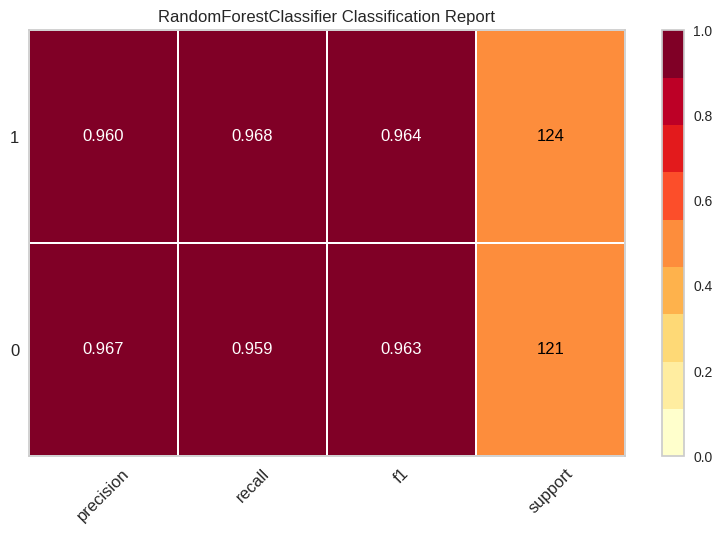

In [22]:
plot_model(rf, plot = 'class_report')

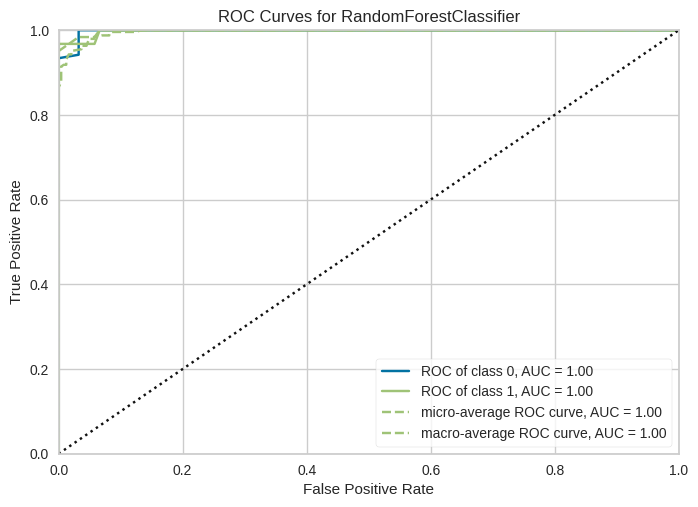

In [23]:
plot_model(tuned_rf, plot='auc')

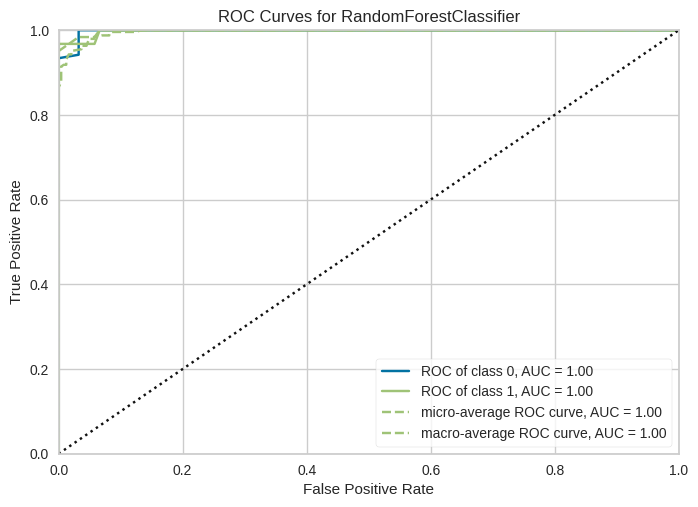

In [24]:
plot_model(rf, plot='auc')

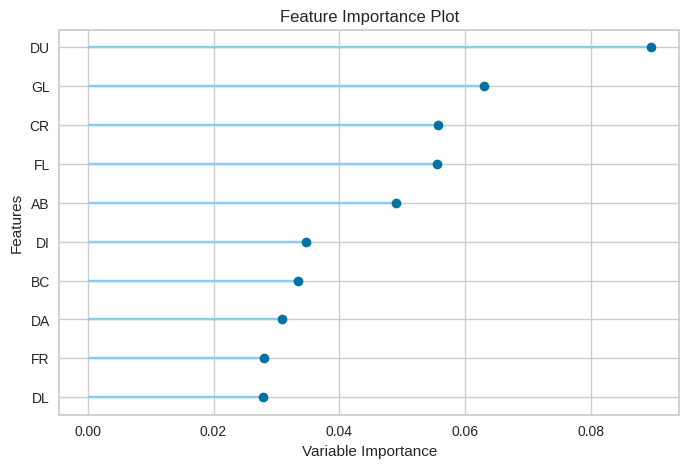

In [25]:
plot_model(tuned_rf, plot='feature')

Entrenamos con los datos que no conoce el modelo

In [26]:
unseen_predictions=predict_model(rf, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9951,0.9995,1.0000,0.9897,0.9948,0.9902,0.9902


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,EJ_encoded,Class,prediction_label,prediction_score
0,0.324748,5188.682129,85.200150,12.968687,8.138688,4.593391,0.025578,10.685041,1.229900,4951.698730,...,24.515421,98.929756,5563.130859,21.994831,33.300968,21.978001,0,0,0,0.93
1,0.760594,6957.752930,200.089279,23.462872,8.138688,7.627599,0.025578,16.794830,1.229900,12083.348633,...,42.928730,72.611061,8192.630859,32.659218,53.813957,0.437845,1,0,0,0.82
2,0.132463,2160.544434,85.200150,20.300835,8.138688,4.810437,0.025578,9.371074,5.158552,4589.927246,...,11.618198,72.611061,21451.810547,37.265816,51.308826,21.978001,0,0,0,0.93
3,0.371751,2354.541504,105.030540,5.150311,8.138688,10.409325,0.025578,11.526358,2.754976,5435.445312,...,21.664358,198.469055,5987.708496,32.610844,15.019194,0.136552,1,0,0,0.91
4,0.121780,4306.184082,85.200150,11.325729,8.138688,6.493647,0.025578,16.133120,6.497386,4262.549316,...,22.952684,136.229111,5164.049316,33.306671,71.065643,21.978001,0,0,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.508487,3692.135986,110.621719,13.859075,8.138688,5.377413,0.025578,11.608284,3.756466,4987.597656,...,18.650511,75.393776,946.472351,45.835278,18.729303,0.043662,1,1,1,0.86
200,0.767003,7205.591309,85.200150,25.147640,8.138688,4.110576,0.025578,3.396778,11.733246,6557.073242,...,25.394461,72.611061,1260.860229,27.137253,13.232940,0.047864,1,1,1,0.93
201,0.837508,3503.189697,85.200150,18.334240,12.113640,5.085066,0.025578,11.242768,1.229900,5174.483887,...,13.590222,109.934715,12581.023438,16.558451,95.637245,21.978001,0,1,1,0.94
202,0.264926,1390.035889,85.200150,11.601362,10.217934,5.660901,0.074907,3.396778,3.113404,4906.738770,...,22.966639,72.611061,4646.471680,23.356716,46.537769,0.062450,1,1,1,1.00


In [27]:
final_rf=finalize_model(rf)

In [28]:
#Parametros finales del modelo Random Forest para su despliegue a producción
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AB', 'AF', 'AH', 'AM', 'AR', 'AX',
                                             'AY', 'AZ', 'BC', 'BD ', 'BN',
                                             'BP', 'BR', 'BZ', 'CB', 'CC',
                                             'CD ', 'CF', 'CH', 'CL', 'CR',
                                             'CS', 'CU', 'CW ', 'DA', 'DE',
                                             'DF', 'DH', 'DI', 'DL', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_featu...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                          

In [29]:
save_model(final_rf, 'Final_RF_Model_19Apr2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AB', 'AF', 'AH', 'AM', 'AR', 'AX',
                                              'AY', 'AZ', 'BC', 'BD ', 'BN',
                                              'BP', 'BR', 'BZ', 'CB', 'CC',
                                              'CD ', 'CF', 'CH', 'CL', 'CR',
                                              'CS', 'CU', 'CW ', 'DA', 'DE',
                                              'DF', 'DH', 'DI', 'DL', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featu...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
            

In [30]:
saved_final_rf=load_model('Final_RF_Model_19Apr2024')

Transformation Pipeline and Model Successfully Loaded


## Gradient Boosting Classifier

In [31]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9975,0.9310,0.9643,0.9474,0.8948,0.8953
1,0.9298,0.9889,0.9310,0.9310,0.9310,0.8596,0.8596
2,0.8947,0.9360,0.8621,0.9259,0.8929,0.7897,0.7916
3,0.9825,0.9926,1.0000,0.9667,0.9831,0.9649,0.9655
4,0.9123,0.9791,1.0000,0.8529,0.9206,0.8240,0.8370
5,0.9649,0.9803,1.0000,0.9355,0.9667,0.9297,0.9320
6,0.9649,0.9889,1.0000,0.9355,0.9667,0.9297,0.9320
7,0.9298,0.9815,1.0000,0.8788,0.9355,0.8593,0.8679
8,0.9474,0.9938,0.9655,0.9333,0.9492,0.8946,0.8952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [33]:
tuned_gbc=tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,1.0000,1.0000,0.9667,0.9831,0.9649,0.9655
1,0.9298,0.9852,0.9310,0.9310,0.9310,0.8596,0.8596
2,0.8947,0.9249,0.8621,0.9259,0.8929,0.7897,0.7916
3,0.9825,0.9963,1.0000,0.9667,0.9831,0.9649,0.9655
4,0.9123,0.9803,1.0000,0.8529,0.9206,0.8240,0.8370
5,0.9298,0.9865,1.0000,0.8788,0.9355,0.8593,0.8679
6,0.9649,0.9951,0.9655,0.9655,0.9655,0.9298,0.9298
7,0.9474,0.9852,0.9655,0.9333,0.9492,0.8946,0.8952
8,0.9825,0.9951,1.0000,0.9667,0.9831,0.9649,0.9655


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='log_loss', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           random_state=123, subsample=0.45, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


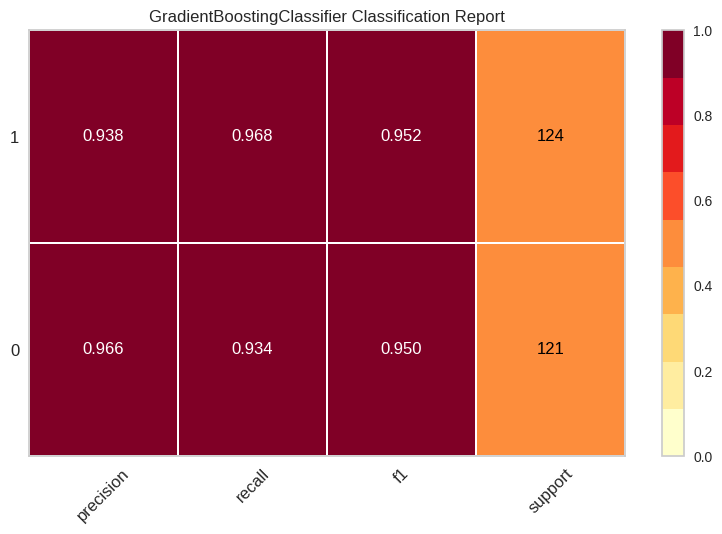

In [35]:
plot_model(gbc, plot = 'class_report')

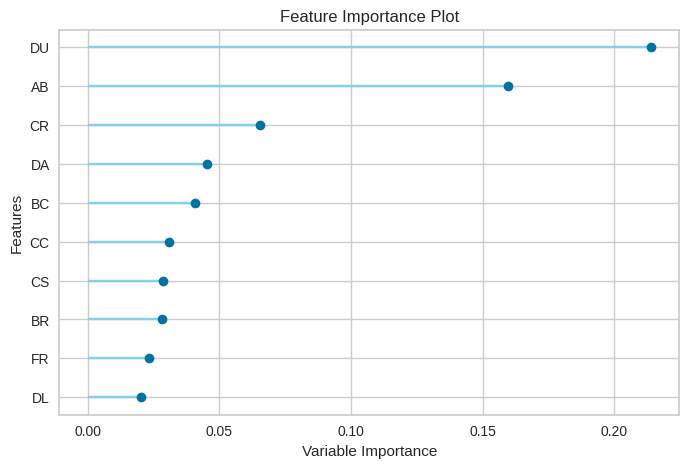

In [36]:
plot_model(tuned_gbc, plot='feature')

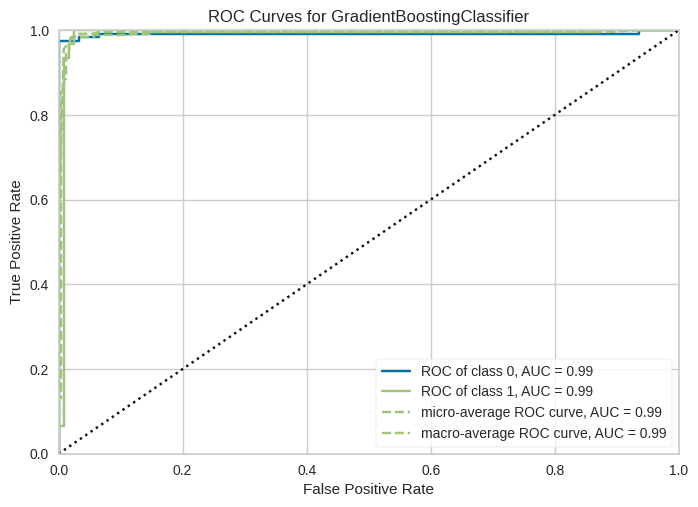

In [37]:
plot_model(tuned_gbc, plot='auc')

Verificamos con los datos que el modelo no conoce

In [38]:
unseen_predictions=predict_model(gbc, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9755,0.9969,1.0000,0.9505,0.9746,0.9510,0.9521


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,EJ_encoded,Class,prediction_label,prediction_score
0,0.324748,5188.682129,85.200150,12.968687,8.138688,4.593391,0.025578,10.685041,1.229900,4951.698730,...,24.515421,98.929756,5563.130859,21.994831,33.300968,21.978001,0,0,0,0.9948
1,0.760594,6957.752930,200.089279,23.462872,8.138688,7.627599,0.025578,16.794830,1.229900,12083.348633,...,42.928730,72.611061,8192.630859,32.659218,53.813957,0.437845,1,0,0,0.9769
2,0.132463,2160.544434,85.200150,20.300835,8.138688,4.810437,0.025578,9.371074,5.158552,4589.927246,...,11.618198,72.611061,21451.810547,37.265816,51.308826,21.978001,0,0,0,0.9717
3,0.371751,2354.541504,105.030540,5.150311,8.138688,10.409325,0.025578,11.526358,2.754976,5435.445312,...,21.664358,198.469055,5987.708496,32.610844,15.019194,0.136552,1,0,0,0.9926
4,0.121780,4306.184082,85.200150,11.325729,8.138688,6.493647,0.025578,16.133120,6.497386,4262.549316,...,22.952684,136.229111,5164.049316,33.306671,71.065643,21.978001,0,0,0,0.9864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.508487,3692.135986,110.621719,13.859075,8.138688,5.377413,0.025578,11.608284,3.756466,4987.597656,...,18.650511,75.393776,946.472351,45.835278,18.729303,0.043662,1,1,1,0.9844
200,0.767003,7205.591309,85.200150,25.147640,8.138688,4.110576,0.025578,3.396778,11.733246,6557.073242,...,25.394461,72.611061,1260.860229,27.137253,13.232940,0.047864,1,1,1,0.9901
201,0.837508,3503.189697,85.200150,18.334240,12.113640,5.085066,0.025578,11.242768,1.229900,5174.483887,...,13.590222,109.934715,12581.023438,16.558451,95.637245,21.978001,0,1,1,0.9715
202,0.264926,1390.035889,85.200150,11.601362,10.217934,5.660901,0.074907,3.396778,3.113404,4906.738770,...,22.966639,72.611061,4646.471680,23.356716,46.537769,0.062450,1,1,1,0.9859


## Linear Regresion

In [39]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8246,0.9101,0.9310,0.7714,0.8438,0.6477,0.6627
1,0.8246,0.8510,0.7931,0.8519,0.8214,0.6494,0.6510
2,0.8596,0.8781,0.8276,0.8889,0.8571,0.7196,0.7213
3,0.8246,0.8830,0.7241,0.9130,0.8077,0.6503,0.6651
4,0.8947,0.9089,0.8966,0.8966,0.8966,0.7894,0.7894
5,0.7193,0.8042,0.7586,0.7097,0.7333,0.4377,0.4388
6,0.7895,0.8584,0.7586,0.8148,0.7857,0.5793,0.5808
7,0.8246,0.8707,0.8276,0.8276,0.8276,0.6490,0.6490
8,0.7895,0.8842,0.7241,0.8400,0.7778,0.5799,0.5856


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [41]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8246,0.9002,0.9310,0.7714,0.8438,0.6477,0.6627
1,0.7895,0.8608,0.7241,0.8400,0.7778,0.5799,0.5856
2,0.8246,0.8645,0.7931,0.8519,0.8214,0.6494,0.6510
3,0.8596,0.8855,0.7931,0.9200,0.8519,0.7199,0.7271
4,0.9123,0.9039,0.9310,0.9000,0.9153,0.8244,0.8249
5,0.7895,0.8387,0.8966,0.7429,0.8125,0.5773,0.5906
6,0.7368,0.8300,0.6552,0.7917,0.7170,0.4751,0.4826
7,0.8246,0.9150,0.8276,0.8276,0.8276,0.6490,0.6490
8,0.8070,0.9163,0.7241,0.8750,0.7925,0.6151,0.6247


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
print(tuned_lr)

LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


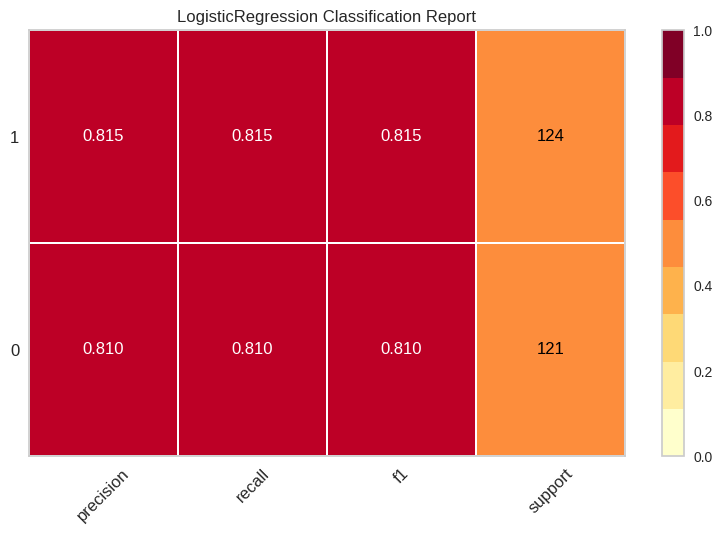

In [43]:
plot_model(lr, plot = 'class_report')

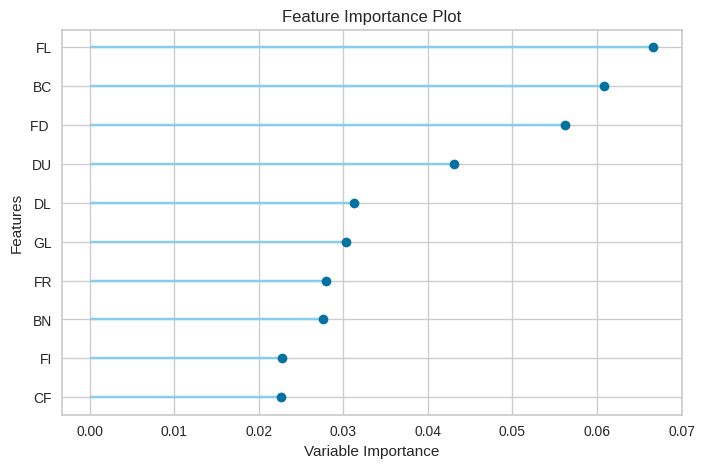

In [44]:
plot_model(lr, plot = 'feature')

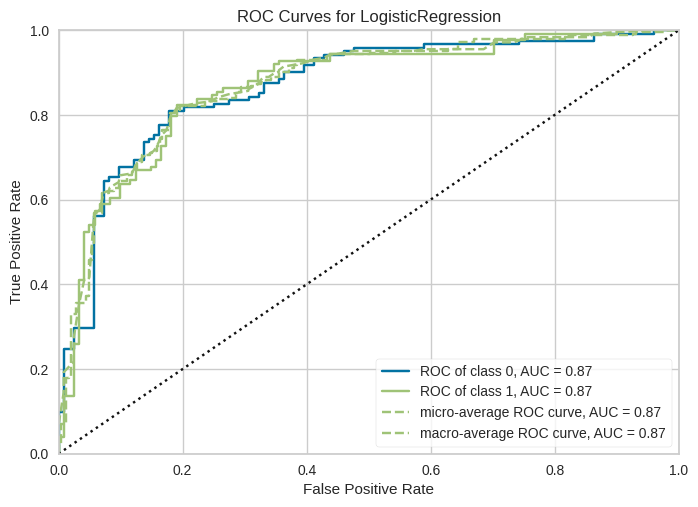

In [45]:
plot_model(lr, plot = 'auc')

Verificamos

In [46]:
unseen_predictions=predict_model(lr, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8382,0.9162,0.7812,0.8621,0.8197,0.6736,0.6763


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,EJ_encoded,Class,prediction_label,prediction_score
0,0.324748,5188.682129,85.200150,12.968687,8.138688,4.593391,0.025578,10.685041,1.229900,4951.698730,...,24.515421,98.929756,5563.130859,21.994831,33.300968,21.978001,0,0,0,0.8419
1,0.760594,6957.752930,200.089279,23.462872,8.138688,7.627599,0.025578,16.794830,1.229900,12083.348633,...,42.928730,72.611061,8192.630859,32.659218,53.813957,0.437845,1,0,1,0.7625
2,0.132463,2160.544434,85.200150,20.300835,8.138688,4.810437,0.025578,9.371074,5.158552,4589.927246,...,11.618198,72.611061,21451.810547,37.265816,51.308826,21.978001,0,0,0,0.8186
3,0.371751,2354.541504,105.030540,5.150311,8.138688,10.409325,0.025578,11.526358,2.754976,5435.445312,...,21.664358,198.469055,5987.708496,32.610844,15.019194,0.136552,1,0,0,0.9757
4,0.121780,4306.184082,85.200150,11.325729,8.138688,6.493647,0.025578,16.133120,6.497386,4262.549316,...,22.952684,136.229111,5164.049316,33.306671,71.065643,21.978001,0,0,0,0.9129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.508487,3692.135986,110.621719,13.859075,8.138688,5.377413,0.025578,11.608284,3.756466,4987.597656,...,18.650511,75.393776,946.472351,45.835278,18.729303,0.043662,1,1,0,0.5171
200,0.767003,7205.591309,85.200150,25.147640,8.138688,4.110576,0.025578,3.396778,11.733246,6557.073242,...,25.394461,72.611061,1260.860229,27.137253,13.232940,0.047864,1,1,1,0.9826
201,0.837508,3503.189697,85.200150,18.334240,12.113640,5.085066,0.025578,11.242768,1.229900,5174.483887,...,13.590222,109.934715,12581.023438,16.558451,95.637245,21.978001,0,1,1,0.6990
202,0.264926,1390.035889,85.200150,11.601362,10.217934,5.660901,0.074907,3.396778,3.113404,4906.738770,...,22.966639,72.611061,4646.471680,23.356716,46.537769,0.062450,1,1,1,0.8771
